# example testing intrinsic dimensionality (ID)

In [1]:
import hyperquest

from spectral import *
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Define path to EMIT surface reflectance
path_to_data = '../tests/data/EMIT_L2A_RFL_001_20240427T165527_2411811_009.nc'

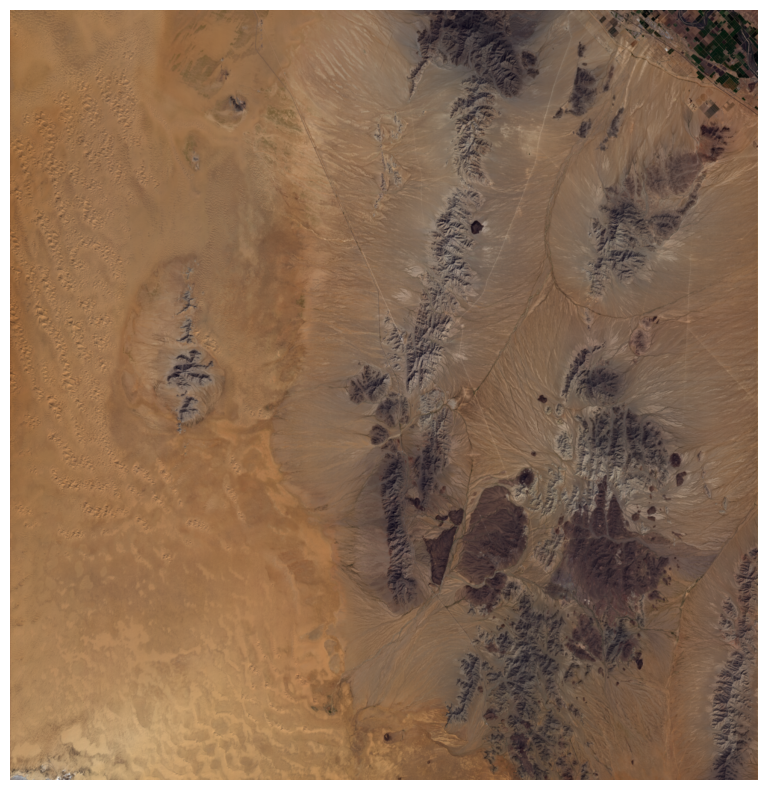

In [3]:
# Load raster
array, fwhm, wave, obs_time = hyperquest.retrieve_data_from_nc(path_to_data)
red = array[:,:,38]
blue = array[:,:,11]
green = array[:,:,24]

red= np.ma.masked_equal(red, -9999)
green = np.ma.masked_equal(green, -9999)
blue = np.ma.masked_equal(blue, -9999)

# Normalize the values for display
plt.figure(figsize=(10, 10))
red_normalized = (red - red.min()) / (red.max() - red.min())
green_normalized = (green - green.min()) / (green.max() - green.min())
blue_normalized = (blue - blue.min()) / (blue.max() - blue.min())
rgb_image = np.dstack((red_normalized, green_normalized, blue_normalized))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9999.351501614385..1.0].


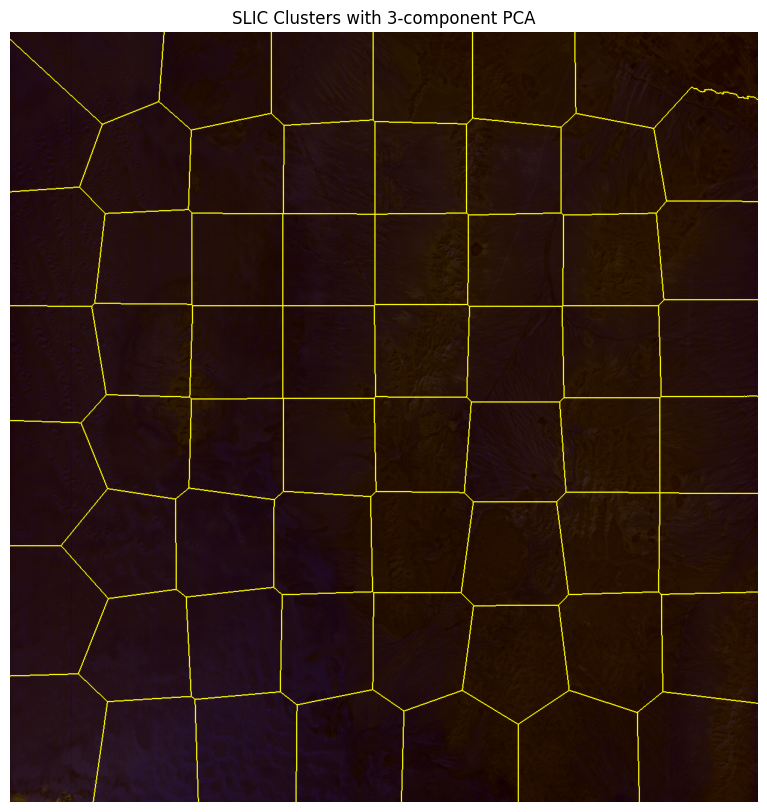

In [4]:
# first 3 components
pca = PCA(n_components=3)
rows, cols, bands = array.shape
array[np.isnan(array)] = -9999
array_reshaped = array.reshape(-1, bands)
array_pca = pca.fit_transform(array_reshaped).reshape(rows, cols, -1)

# SLIC
n_segments = 70
compactness = 0.05


segments = slic(array_pca, 
                n_segments=n_segments, 
                compactness=compactness)


plt.figure(figsize=(10, 10))
plt.imshow(mark_boundaries(array_pca, segments))
plt.title("SLIC Clusters with 3-component PCA")
plt.axis("off")
plt.show()

In [5]:
snr, noise_variance = hyperquest.hrdsdc(path_to_data, n_segments, compactness, 
                                        n_pca=3, ncpus=8, 
                                        include_neighbor_pixel_in_mlr=True, 
                                        no_data_value=-9999)

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
plt.plot(wave, snr)

plt.ylim(0,1000)

In [ ]:
k_eff = hyperquest.random_matrix_theory(path_to_data = path_to_data,
                                        noise_variance = noise_variance,
                                        alpha = 0.5,
                                        no_data_value = -9999)

In [ ]:
snr

In [ ]:
np.nanmin(snr)

In [ ]:
np.min(array[250,250,:])